In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

COLUMNS = ['Date','Total_Cases','New_Daily_Cases','New_Daily_Deaths','Total_Deaths','Total_Recoveries']

In [21]:
import requests
import sys
import csv
import datetime

def generate_csv(code):
    url = "https://thevirustracker.com/free-api?countryTimeline=" + code

    r = requests.get(url, headers={"User-Agent": "XY"})

    data = r.json()
    keys = data['timelineitems'][0].keys()
    length = len(keys)
    name = "covid" + code + ".csv"
    with open(name, 'w', newline='') as file:
                writer = csv.writer(file)
                for key in keys:
                    if length > 1:
                        row = []
                        #x = datetime.datetime.strptime(key, '%m/%d/%y')
                        #xn = x - datetime.timedelta(days=1)
                        #date = xn.strftime("%m/%d/%y")
                        row.append(key)
                        row.append(data['timelineitems'][0][key]['total_cases'])
                        row.append(data['timelineitems'][0][key]['new_daily_cases'])
                        row.append(data['timelineitems'][0][key]['new_daily_deaths'])
                        row.append(data['timelineitems'][0][key]['total_deaths'])
                        row.append(data['timelineitems'][0][key]['total_recoveries'])
                        writer.writerow(row)
                        length-=1

In [3]:
def create_dataset(siglas):
    result = pd.DataFrame()
    for i in siglas:
        t = generate_csv(i)
        t_d = pd.read_csv('covid'+i+'.csv')
        tmp = [j+i for j in COLUMNS[1:]]
        tmp.insert(0,'Date')
        t_d.columns = tmp
        t_d.set_index('Date', inplace=True, drop=True)
        result = pd.concat([result,t_d], axis=1, sort=True)    

In [22]:
generate_csv("PT")
generate_csv("IT")
generate_csv("ES")

In [26]:
dataPT = pd.read_csv('covidPT.csv')
tmp = [i+"PT" for i in COLUMNS[1:]]
tmp.insert(0,'Date')
dataPT.columns = tmp
dataPT.set_index('Date', inplace=True, drop=True)
dataPT.tail()

dataPT.to_csv('../predictions/test.csv')

In [28]:
dataES = pd.read_csv('covidES.csv')
tmp = [i+"ES" for i in COLUMNS[1:]]
tmp.insert(0,'Date')
dataES.columns = tmp
dataES.set_index('Date', inplace=True, drop=True)

dataIT = pd.read_csv('covidIT.csv')
tmp = [i+"IT" for i in COLUMNS[1:]]
tmp.insert(0,'Date')
dataIT.columns = tmp
dataIT.set_index('Date', inplace=True, drop=True)
dataIT.tail()

,Total_CasesIT,New_Daily_CasesIT,New_Daily_DeathsIT,Total_DeathsIT,Total_RecoveriesIT
Date,,,,,
4/05/20,128948,4316,525,15887,7024
4/06/20,132547,3599,636,16523,7024
4/07/20,135586,3039,604,17127,7024
4/08/20,139422,3836,542,17669,7024
4/09/20,143626,4204,610,18279,7024


In [29]:
# Visualization
X = dataPT.drop(columns=['New_Daily_Deaths','Date'], axis=0)
y = dataPT['New_Daily_Deaths']

time = dataIT.drop(columns=['New_Daily_Deaths','New_Daily_Cases','Total_Deaths','Total_Recoveries'], axis=0)
time.head()
sb.lineplot('Date','Total_Cases',data=time)

KeyError: "['New_Daily_Deaths' 'Date'] not found in axis"

In [30]:
def create_dataset_v2(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [64]:
from sklearn.preprocessing import MinMaxScaler
values = dataIT[['Total_CasesIT']].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

train_size = int(len(scaled) * 0.85)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

trainX, trainY = create_dataset_v2(train, 5)
testX, testY = create_dataset_v2(test, 5)

print(trainX.shape)

trainX = np.reshape(trainX, (trainX.shape[0], 5, 1))
testX = np.reshape(testX, (testX.shape[0], 5, 1))

print(trainX.shape)
print(trainX[:5])
print(testX[:5])

56 11
(51, 5)
(51, 5, 1)
[[[0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]

 [[0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]]

 [[0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [6.962625e-06]]

 [[0.000000e+00]
  [0.000000e+00]
  [0.000000e+00]
  [6.962625e-06]
  [6.962625e-06]]

 [[0.000000e+00]
  [0.000000e+00]
  [6.962625e-06]
  [6.962625e-06]
  [6.962625e-06]]]
[[[0.7083565 ]
  [0.736576  ]
  [0.7698713 ]
  [0.8023728 ]
  [0.83429646]]

 [[0.736576  ]
  [0.7698713 ]
  [0.8023728 ]
  [0.83429646]
  [0.86775184]]

 [[0.7698713 ]
  [0.8023728 ]
  [0.83429646]
  [0.86775184]
  [0.89780253]]

 [[0.8023728 ]
  [0.83429646]
  [0.86775184]
  [0.89780253]
  [0.92286104]]

 [[0.83429646]
  [0.86775184]
  [0.89780253]
  [0.92286104]
  [0.94402045]]]


In [32]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model_ls = Sequential()
model_ls.add(LSTM(18,return_sequences=True, input_shape=(trainX.shape[1],trainX.shape[2])))
model_ls.add(Dropout(0.2))
model_ls.add(LSTM(18))
model_ls.add(Dropout(0.5))
model_ls.add(Dense(1, activation='linear'))
model_ls.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['accuracy'])
history = model_ls.fit(trainX, trainY, epochs=100, batch_size=16, validation_data=(testX,testY), shuffle=False)


Train on 51 samples, validate on 6 samples
Epoch 1/100
51/51 [==============================] - 3s 55ms/sample - loss: 0.0380 - accuracy: 0.0196 - val_loss: 0.4351 - val_accuracy: 0.0000e+00
Epoch 2/100
51/51 [==============================] - 0s 631us/sample - loss: 0.0375 - accuracy: 0.0196 - val_loss: 0.4351 - val_accuracy: 0.0000e+00
Epoch 3/100
51/51 [==============================] - 0s 600us/sample - loss: 0.0355 - accuracy: 0.0196 - val_loss: 0.4351 - val_accuracy: 0.0000e+00
Epoch 4/100
51/51 [==============================] - 0s 602us/sample - loss: 0.0354 - accuracy: 0.0196 - val_loss: 0.4190 - val_accuracy: 0.0000e+00
Epoch 5/100
51/51 [==============================] - 0s 623us/sample - loss: 0.0309 - accuracy: 0.0196 - val_loss: 0.3816 - val_accuracy: 0.0000e+00
Epoch 6/100
51/51 [==============================] - 0s 638us/sample - loss: 0.0280 - accuracy: 0.0196 - val_loss: 0.3395 - val_accuracy: 0.0000e+00
Epoch 7/100
51/51 [==============================] - 0s 569us/sa

51/51 [==============================] - 0s 571us/sample - loss: 0.0028 - accuracy: 0.0196 - val_loss: 0.0146 - val_accuracy: 0.1667
Epoch 57/100
51/51 [==============================] - 0s 593us/sample - loss: 0.0017 - accuracy: 0.0196 - val_loss: 0.0151 - val_accuracy: 0.1667
Epoch 58/100
51/51 [==============================] - 0s 543us/sample - loss: 0.0022 - accuracy: 0.0196 - val_loss: 0.0134 - val_accuracy: 0.1667
Epoch 59/100
51/51 [==============================] - 0s 556us/sample - loss: 0.0032 - accuracy: 0.0196 - val_loss: 0.0096 - val_accuracy: 0.1667
Epoch 60/100
51/51 [==============================] - 0s 546us/sample - loss: 0.0030 - accuracy: 0.0196 - val_loss: 0.0060 - val_accuracy: 0.1667
Epoch 61/100
51/51 [==============================] - 0s 559us/sample - loss: 0.0047 - accuracy: 0.0196 - val_loss: 0.0028 - val_accuracy: 0.1667
Epoch 62/100
51/51 [==============================] - 0s 523us/sample - loss: 0.0030 - accuracy: 0.0196 - val_loss: 0.0018 - val_accuracy

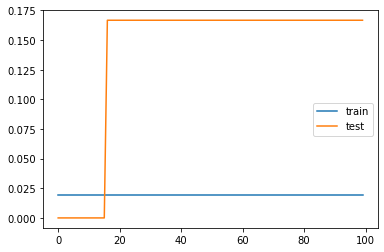

In [69]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

In [19]:
predictions = model_ls.predict(testX)
print(scaler.inverse_transform(predictions))

[[39628.58 ]
 [44803.42 ]
 [50227.754]
 [55578.277]
 [61252.895]
 [66529.46 ]
 [71681.29 ]]


In [7]:
def prepare_dataset(dataset, timesteps=5, multisteps=1):
    data = dataset.values
    X=[]
    y=[]
    for i in range(dataset.shape[0] - (timesteps + multisteps)):
        input_index = i + timesteps
        label_index = input_index + multisteps
        X.append(data[i:input_index,:])
        y.append(data[input_index:label_index,0])
    return X,y

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Prepare data from LSTM
data_lstm = dataIT.drop(columns=['New_Daily_CasesIT','New_Daily_DeathsIT','Total_DeathsIT','Total_RecoveriesIT'], axis=0)
#data_lstm['Date'] = range(0,len(dataIT_dates))
#print(data_lstm.head)

scaler = MinMaxScaler((-1,1))
data_lstm['Total_CasesIT'] = scaler.fit_transform(np.array(data_lstm['Total_CasesIT']).reshape(-1,1))
#print(data_lstm)
X, y = prepare_dataset(data_lstm)

X_reshaped = np.array(X).reshape((52,5,1))
print(X_reshaped)

[[[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-1.        ]
  [-0.99997953]]

 [[-1.        ]
  [-1.        ]
  [-1.        ]
  [-0.99997953]
  [-0.99997953]]

 [[-1.        ]
  [-1.        ]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-1.        ]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]
  [-0.99997953]]

 [[-0.99997953]


In [9]:
train_size = int(len(X_reshaped) * 0.66)
train_x, test_x = X_reshaped[0:train_size], X_reshaped[train_size:len(X_reshaped)]
train_y, test_y = y[0:train_size], y[train_size:len(y)]

In [10]:
# LSTM
from tensorflow.keras import Sequential, layers, optimizers, losses

TIMESTAMPS = 5
FEATURES   = 1
BATCH_SIZE = 52


model = Sequential()
model.add(layers.LSTM(8,stateful=True,
                      batch_input_shape=(1,TIMESTAMPS,FEATURES)))
model.add(layers.Dense(FEATURES,activation='relu'))

model.compile(
    loss="mean_squared_error",
    optimizer= optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
for i in range(100):
    model.fit(train_x,train_y, shuffle=False, batch_size=1, epochs=1, verbose=2)
    model.reset_states()

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), for inputs ['dense'] but instead got the following list of 34 arrays: [array([[-1.]]), array([[-1.]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]), array([[-0.99997953]]),...

In [ ]:
for i in range(len(test)):
        # make one-step forecast
        Xx, yy = test[i, 0:-1], test[i, -1]
        yhat = model.predict(X, batch_size=BATCH_SIZE)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions.append(yhat)
        # report performance
    rmse = sqrt(mean_squared_error(raw_values[train_size:len(supervised_values)], predictions))
    print('%d) Test RMSE: %.3f' % (r+1, rmse))
    error_scores.append(rmse)

In [137]:
# Linear Regression
data_reg = dataIT.drop(columns=['New_Daily_CasesIT','New_Daily_DeathsIT','Total_DeathsIT','Total_RecoveriesIT'], axis=0)
data_reg = data_reg.shift(5)
data_reg.head()


#from sklearn.linear_model import LinearRegression
#model_death = LinearRegression()
#model_death.fit(X,y)
#new_y = model.predict()

,Total_CasesIT
Date,
01/30/2020,NaN
01/31/2020,NaN
02/01/2020,NaN
02/02/2020,NaN
02/03/2020,NaN


            Total_CasesPT
Date                     
03/01/2020              2
03/02/2020              2
03/03/2020              5
03/04/2020              9
03/05/2020             13


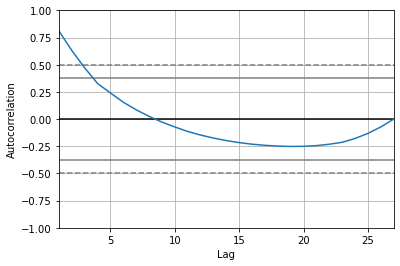

In [82]:
data_arima = dataPT[['Total_CasesPT']]
print(data_arima.head())
pd.plotting.autocorrelation_plot(data_arima)
plt.show()

/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -171.106
Date:                Fri, 10 Apr 2020   AIC                            354.213
Time:                        00:23:19   BIC                            361.761
Sample:                             0   HQIC                           356.387
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4121      0.677      0.609      0.543      -0.915       1.739
ar.L2          0.6828      0.420      1.627      0.104      -0.140       1.505
ar.L3          0.0909      0.778      0.117      0.9

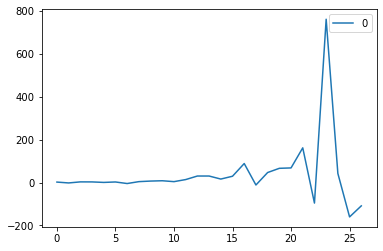

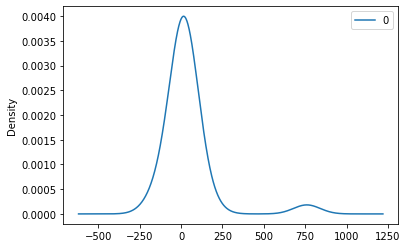

                0
count   27.000000
mean    37.133890
std    156.539425
min   -160.121833
25%      1.233810
50%      6.715264
75%     36.123753
max    759.952769


In [83]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_arima.values, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=909.815686, expected=786.000000
predicted=971.374976, expected=1020.000000
predicted=1243.305940, expected=1280.000000
predicted=1528.684726, expected=1600.000000
predicted=1911.139682, expected=2060.000000
predicted=2537.831911, expected=2362.000000
predicted=2839.379161, expected=3544.000000
predicted=3628.058258, expected=4268.000000
predicted=5817.819315, expected=5170.000000
predicted=6518.744394, expected=5962.000000
Test MSE: 171285.344


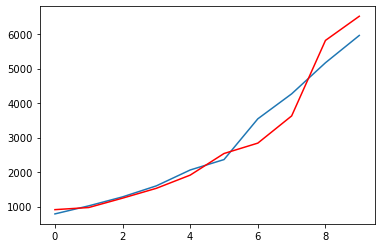

In [84]:
from sklearn.metrics import mean_squared_error

X = data_arima.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [55]:
import datetime
#data_arima.head()
data_arima.reset_index(inplace=True)
xn = datetime.datetime.strptime(data_arima.iloc[-1]['Date'], '%m/%d/%Y') + datetime.timedelta(days=5)
xn.strftime("%m/%d/%Y")

'04/03/2020'

In [105]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

import datetime
def predict_with_arima(data, days=5, y='Total_Cases', code='IT'):
    history = [x for x in data.values]
    news = []
    data_mod = data.reset_index()
    for i in range(days):
        print(history[-5:])
        model = Holt(history)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        history.append(np.array([round(yhat)]))
        
        xn = datetime.datetime.strptime(data_mod.iloc[-1]['Date'], '%m/%d/%y') + datetime.timedelta(days=i+1)
        
        news.append(
            pd.Series([xn.strftime("%m/%d/%y"), yhat], index=data_mod.columns )
        )
        
    data_mod = data_mod.append(news)
    data_mod.set_index('Date', inplace=True, drop=True)
    return history, data_mod

In [106]:
forecasted_data, dataset = predict_with_arima(dataIT[['Total_CasesIT']], code='IT', days=5)
#plt.figure(figsize=(15, 5))
#plt.plot(data_arima.values, color='blue')
#plt.plot(forecasted_data, color='red')
print(forecasted_data[-10:])
print(dataset.tail(15))

[array([128948]), array([132547]), array([135586]), array([139422]), array([143626])]
[array([132547]), array([135586]), array([139422]), array([143626]), array([147457.])]
[array([135586]), array([139422]), array([143626]), array([147457.]), array([151347.])]
[array([139422]), array([143626]), array([147457.]), array([151347.]), array([155237.])]
[array([143626]), array([147457.]), array([151347.]), array([155237.]), array([159127.])]
[array([128948]), array([132547]), array([135586]), array([139422]), array([143626]), array([147457.]), array([151347.]), array([155237.]), array([159127.]), array([163017.])]
          Total_CasesIT
Date                   
3/31/20   105792.000000
4/01/20   110574.000000
4/02/20   115242.000000
4/03/20   119827.000000
4/04/20   124632.000000
4/05/20   128948.000000
4/06/20   132547.000000
4/07/20   135586.000000
4/08/20   139422.000000
4/09/20   143626.000000
04/10/20  147456.528595
04/11/20  151346.957727
04/12/20  155237.021891
04/13/20  159127.020261


In [107]:
print(data_arima.tail())

            Total_CasesIT
Date                     
03/24/2020          69176
03/26/2020          80589
03/27/2020          86498
03/28/2020          92472
03/29/2020          97689


13758.325244981675
9352.465048996335
8471.293009799267
8295.058601959852
8259.81172039197


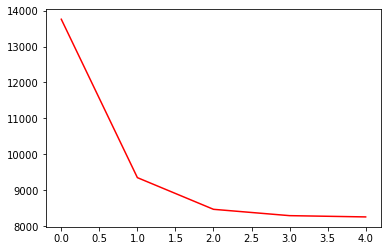

In [80]:
# Exponential Smoothening
from statsmodels.tsa.holtwinters import ExponentialSmoothing

X = dataPT[['Total_CasesPT']].values
history = [x for x in X]
predictions = list()
for t in range(5):
    model = ExponentialSmoothing(history[t:])
    model_fit = model.fit(smoothing_level=0.8)
    output = model_fit.forecast()
    yhat = output[0]
    print(yhat)
    predictions.append(yhat)
    history.append(obs)

# plot
plt.plot(predictions, color='red')
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            Total_CasesIT
Date                     
01/30/2020       2.000000
01/31/2020       2.000000
02/01/2020       2.000000
02/02/2020       2.000000
02/03/2020       2.000000
...                   ...
04/04/2020  130075.074160
04/05/2020  135726.799266
04/06/2020  141281.556793
04/07/2020  146452.931932
04/08/2020  151652.852156

[68 rows x 1 columns]
            ds      y
53  03/24/2020  69176
54  03/26/2020  80589
55  03/27/2020  86498
56  03/28/2020  92472
57  03/29/2020  97689
            Total_CasesIT
Date                     
03/24/2020          69176
03/26/2020          80589
03/27/2020          86498
03/28/2020          92472
03/29/2020          97689


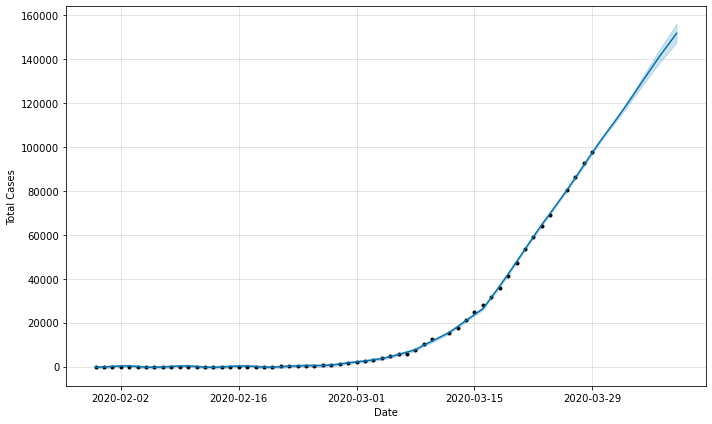

In [117]:
#PROPHET
from fbprophet import Prophet

tmp = dataIT[['Total_CasesIT']]
data_prophet = tmp.reset_index()
data_prophet = data_prophet.rename(columns={'Date': 'ds', 'Total_CasesIT': 'y'})

model_prophet = Prophet(changepoint_prior_scale=0.1)
model_prophet.fit(data_prophet)

data_prophet_forecast = model_prophet.make_future_dataframe(periods=10)
data_prophet_forecast = model_prophet.predict(data_prophet_forecast)

model_prophet.plot(data_prophet_forecast, xlabel = 'Date', ylabel = 'Total Cases')

dt = data_prophet_forecast[['ds','yhat']][-10:]
dt = dt.rename(columns={'ds': 'Date', 'yhat': 'Total_CasesIT'})
dt['Date'] = dt['Date'].dt.strftime('%m/%d/%Y')
dt.set_index('Date', inplace=True, drop=True)

tmpdata = dataIT.drop(columns=['New_Daily_CasesIT','New_Daily_DeathsIT','Total_DeathsIT','Total_RecoveriesIT'], axis=0)
tmpdata = tmpdata.append(dt)
print(tmpdata)
print(data_prophet.tail())
print(tmp.tail())

In [73]:
tmp = dataIT[['Total_CasesIT']]
tmp['Type'] = "prediction"
tmp
dataES[['Total_CasesES','Type']] = tmp
dataES

/home/msi-gtfo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Total_CasesES,New_Daily_CasesES,New_Daily_DeathsES,Total_DeathsES,Total_RecoveriesES,Type
Date,,,,,,
01/31/2020,2,1,0,0,0,prediction
02/01/2020,2,0,0,0,0,prediction
02/02/2020,2,0,0,0,0,prediction
02/03/2020,2,0,0,0,0,prediction
02/04/2020,2,0,0,0,0,prediction
02/05/2020,2,0,0,0,0,prediction
02/06/2020,3,0,0,0,0,prediction
02/07/2020,3,0,0,0,0,prediction
02/08/2020,3,1,0,0,0,prediction


In [80]:
tt = dataES[['Total_CasesES']]
#tt.columns = ["a","b"]
print(tt.head())

            Total_CasesES
Date                     
01/31/2020              2
02/01/2020              2
02/02/2020              2
02/03/2020              2
02/04/2020              2
